<a href="https://colab.research.google.com/github/nagamukesh/NLP-SMP/blob/Dinesh_Manideep/NLP_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [2]:
! kaggle datasets download -d datatattle/email-classification-nlp

Dataset URL: https://www.kaggle.com/datasets/datatattle/email-classification-nlp
License(s): copyright-authors
  0% 0.00/46.8k [00:00<?, ?B/s]
100% 46.8k/46.8k [00:00<00:00, 16.5MB/s]


In [3]:
!unzip email-classification-nlp.zip -d /content/data

Archive:  email-classification-nlp.zip
  inflating: /content/data/SMS_test.csv  
  inflating: /content/data/SMS_train.csv  


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
import re
import string
string.punctuation
ps = nltk.PorterStemmer()
wn = nltk.WordNetLemmatizer()
stopwords = nltk.corpus.stopwords.words('english')
from sklearn.feature_extraction.text import TfidfVectorizer
import string



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [5]:
#read data from csv
train_data=pd.read_csv('data/SMS_train.csv',encoding='latin-1')
test_data=pd.read_csv('data/SMS_test.csv',encoding='latin-1')
print(train_data)
print(test_data)


     S. No.                                       Message_body     Label
0         1                         Rofl. Its true to its name  Non-Spam
1         2  The guy did some bitching but I acted like i'd...  Non-Spam
2         3  Pity, * was in mood for that. So...any other s...  Non-Spam
3         4               Will ü b going to esplanade fr home?  Non-Spam
4         5  This is the 2nd time we have tried 2 contact u...      Spam
..      ...                                                ...       ...
952     953  hows my favourite person today? r u workin har...  Non-Spam
953     954                      How much you got for cleaning  Non-Spam
954     955  Sorry da. I gone mad so many pending works wha...  Non-Spam
955     956                                 Wat time ü finish?  Non-Spam
956     957                    Just glad to be talking to you.  Non-Spam

[957 rows x 3 columns]
     S. No.                                       Message_body     Label
0         1  UpgrdCentre Or

In [6]:
!pip install nltk

In [7]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    text = [wn.lemmatize(word) for word in text]
    return text

In [8]:

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100
#for training data
train_data['Message_len'] = train_data['Message_body'].apply(lambda x: len(x) - x.count(" "))
train_data['punct%'] = train_data['Message_body'].apply(lambda x: count_punct(x))


#for testing data
test_data['Message_len'] = test_data['Message_body'].apply(lambda x: len(x) - x.count(" "))
test_data['punct%'] = test_data['Message_body'].apply(lambda x: count_punct(x))


In [9]:
from sklearn.model_selection import train_test_split

X_train=train_data[['Message_body', 'Message_len', 'punct%']]
y_train=train_data['Label'].apply(lambda x: 1 if x =='Spam' else 0)
#add column name as Label to y_train
y_train.name='Label'


X_test=test_data[['Message_body', 'Message_len', 'punct%']]
y_test=test_data['Label']



In [10]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)


tfidf_vect_fit = tfidf_vect.fit(X_train['Message_body'])

tfidf_train = tfidf_vect_fit.transform(X_train['Message_body'])
tfidf_test = tfidf_vect_fit.transform(X_test['Message_body'])

X_train_vect = pd.concat([X_train[['Message_len', 'punct%']].reset_index(drop=True),
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['Message_len', 'punct%']].reset_index(drop=True),
           pd.DataFrame(tfidf_test.toarray())], axis=1)


X_train_vect.columns = X_train_vect.columns.astype(str)
X_test_vect.columns = X_test_vect.columns.astype(str)
print(X_train_vect)
print(X_test_vect)
print(y_train)
print(y_test)



     Message_len  punct%    0    1    2    3    4    5    6    7  ...  2803  \
0             21     4.8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
1            100     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
2             48    14.6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
3             29     3.4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
4            131     6.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
..           ...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
952           83     4.8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
953           24     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
954           43     4.7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
955           15     6.7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
956           25     4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   

     2804  2805  2806  2807  2808  2809  2810  2811

In [11]:
! pip install yellowbrick

In [12]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import confusion_matrix, classification_report
from yellowbrick.classifier import ClassificationReport

Precision: 1.0 / Recall: 0.618 / F1-Score: 0.764 / Accuracy: 76.8%


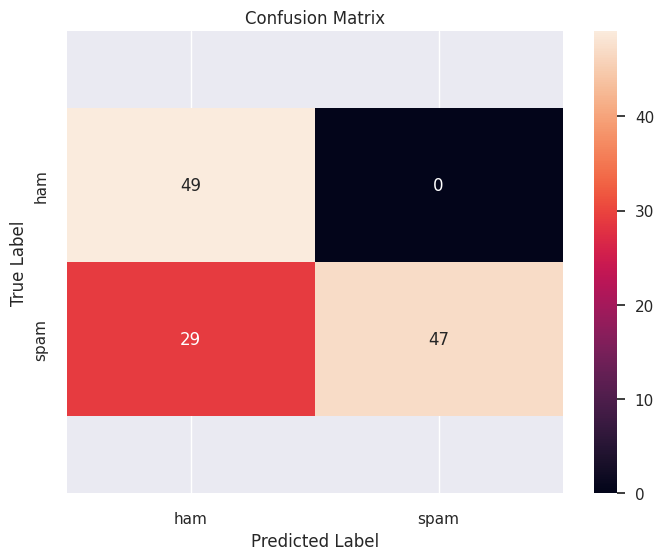

a


In [13]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

rf_model = rf.fit(X_train_vect, y_train)

y_pred = rf_model.predict(X_test_vect)
#convert 0 or 1 into ham and spam in y_pred
y_pred = [('Spam' if pred == 1 else 'Non-Spam') for pred in y_pred]

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='Spam', average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}%'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred)*100, 3)))

sns.set(rc= {"figure.figsize": (8, 6)})

cm = confusion_matrix(y_test, y_pred)
class_label = ["ham", "spam"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
ax = sns.heatmap(df_cm, annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
print('a')